<a href="https://colab.research.google.com/github/EstiAsmareta/dataset-sentimen-analisis/blob/main/RNN_NLP_CATEGORICAL_SENTIMEN_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMPORTS**

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import nltk

OOV_TOKEN = "<OOV>"

Data 1

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/EstiAsmareta/dataset-sentimen-analisis/main/Book1.csv", encoding='latin1')
df.head()

,komentar,labels
0,Checkout sore langsung dikerjakan oleh adminny...,1
1,"pelayanan nya gercep , penjual fast respon ban...",1
2,"Hasil joss, penjual sabar, revisi tidak dibata...",1
3,Terima kasih pelayanannya...sampai revisi 5x l...,1
4,"Desainnya cepat, admin nya ramah. Hasilnya bag...",1


In [3]:
df = df.rename(columns={'komentar': 'sentences'})
df = df.rename(columns={'labels': 'label'})

In [4]:
df.head()

,sentences,label
0,Checkout sore langsung dikerjakan oleh adminny...,1
1,"pelayanan nya gercep , penjual fast respon ban...",1
2,"Hasil joss, penjual sabar, revisi tidak dibata...",1
3,Terima kasih pelayanannya...sampai revisi 5x l...,1
4,"Desainnya cepat, admin nya ramah. Hasilnya bag...",1


data 2

In [5]:
df_lain = pd.read_csv("https://raw.githubusercontent.com/ShinyQ/Analisis-Sentimen-Aplikasi-Dompet-Digital-Indonesia-Menggunakan-Metode-CNN-LSTM/main/data/classifiedV1/dana_cs.csv")
df_lain.head()

,raw,processed,predict
0,Saya sangat kecewa dengan dana. Transaksi tran...,kecewa dana transaksi transfer rekening baca t...,-1
1,"Dari 2018 sampai skg menggunakan dana, baru ka...",menggunakan dana kali kecewa transfer rekening...,-1
2,Aplikasi sampah!!! Uang gua ketahan (menunggu)...,aplikasi sampah uang ketahan menunggu gara tf ...,-1
3,Saya sudah kirim email prihal pelepasan akun p...,kirim email prihal pelepasan akun premium pros...,-1
4,Parah sekali untuk responnya. Seharusnya untuk...,parah untuk responnya untuk aplikasi memperker...,-1


In [6]:
df_lain = df_lain.rename(columns={'predict': 'label'})
df_lain = df_lain.rename(columns={'raw': 'sentences'})

df_lain.head()

,sentences,processed,label
0,Saya sangat kecewa dengan dana. Transaksi tran...,kecewa dana transaksi transfer rekening baca t...,-1
1,"Dari 2018 sampai skg menggunakan dana, baru ka...",menggunakan dana kali kecewa transfer rekening...,-1
2,Aplikasi sampah!!! Uang gua ketahan (menunggu)...,aplikasi sampah uang ketahan menunggu gara tf ...,-1
3,Saya sudah kirim email prihal pelepasan akun p...,kirim email prihal pelepasan akun premium pros...,-1
4,Parah sekali untuk responnya. Seharusnya untuk...,parah untuk responnya untuk aplikasi memperker...,-1


In [7]:
df_lain.count()

sentences    610
processed    610
label        610
dtype: int64

data 3

In [8]:
df_lain1 = pd.read_csv("https://raw.githubusercontent.com/wandalistathea/analisis_sentimen_tokopedia/main/Data%20Oke%20Setelah%20Di-Stemming%20(Masing2%203k).csv")
df_lain1.head()

,content,score,sentimen,content_clean
0,Aku meh donwload lagu malah metu link mengkene,1,0,meh download lagu metu link mengkene
1,"Saya turunkan, disaat kayak gini ovo paylater ...",1,0,turun ovo paylater cekek lunas total bulan tak...
2,bagus,3,0,bagus
3,Saya membeli pelatihan membuat dan menjual mas...,3,0,beli latih jual masker kain lawan virus corona...
4,Toko pedia ngpusi,1,0,tokopedia ngpusi


In [9]:
df_lain1['label'] = df_lain1['sentimen'].replace({0: -1})
print(df_lain1)

                                                content  score  sentimen  \
0        Aku meh donwload lagu malah metu link mengkene      1         0   
1     Saya turunkan, disaat kayak gini ovo paylater ...      1         0   
2                                                 bagus      3         0   
3     Saya membeli pelatihan membuat dan menjual mas...      3         0   
4                                     Toko pedia ngpusi      1         0   
...                                                 ...    ...       ...   
5995  Sangat menarik tempat beli online untuk ikut p...      5         1   
5996  Trimakasih tokopedia . Sukses selalu. Trimakas...      5         1   
5997                                             Mangap      5         1   
5998  Terima kasih toko pedia, berkat apl ini saya s...      5         1   
5999                                         Jos pokoke      4         1   

                                          content_clean  label  
0                  meh

In [10]:
df_lain1 = pd.DataFrame(df_lain1)
df_lain1 = df_lain1.rename(columns={'content':'sentences'})
df_lain1.columns

Index(['sentences', 'score', 'sentimen', 'content_clean', 'label'], dtype='object')

data 4

In [11]:
df_lain2 = pd.read_csv('https://raw.githubusercontent.com/EstiAsmareta/dataset-sentimen-analisis/main/predicted_comments.csv')
df_lain2.head()

,project_ending,rating,text,sentiment
0,Completed,NaN,Terimakasih banyak.,1
1,Self Mediation,NaN,NaN,1
2,Completed,NaN,Selalu keren hasil pekerjaannya.,1
3,Completed,NaN,Selalu puas dengan hasil pekerjaannya...,1
4,Completed,NaN,Mantap! Perkerjaannya cepat dan memuaskan,1


In [12]:
# df_lain2 = df_lain2.rename(columns={'sentimen':'label'})
df_lain2 = df_lain2.rename(columns={'sentiment':'label'})
df_lain2 = df_lain2.rename(columns={'text':'sentences'})
(df_lain2.head())

,project_ending,rating,sentences,label
0,Completed,NaN,Terimakasih banyak.,1
1,Self Mediation,NaN,NaN,1
2,Completed,NaN,Selalu keren hasil pekerjaannya.,1
3,Completed,NaN,Selalu puas dengan hasil pekerjaannya...,1
4,Completed,NaN,Mantap! Perkerjaannya cepat dan memuaskan,1


In [13]:
df_lain2['label'] = df_lain2['label'].replace(2, -1)
df_lain2.dropna(inplace=True)
df_lain2['label'].value_counts()

Series([], Name: count, dtype: int64)

data 5

In [14]:
df_lain3 = pd.read_csv('https://raw.githubusercontent.com/kaenova/Analisis-Sentimen-Aplikasi-Dompet-Digital-Indonesia-Menggunakan-Metode-CNN-Dan-LSTM/main/data/manualLabelV1/FinalLabel.csv')
df_lain3.head()

,raw,processed,labels
0,Mau ganti nomer akun dana lama no nya hilang s...,ganti nomer akun dana no hilang email whatsapp...,-1
1,Ketauan pake yang lain teman2 pake dana susah ...,ketahuan pakai teman pakai dana susah banget t...,-1
2,"aneh, verifikasi KTP. katanya KTP gua palsu. S...",aneh verifikasi ktp katanya ktp palsu sim pals...,-1
3,Gwe kirim ke req masih proses belum ada konfir...,kirim request proses konfirm masuk pihak dana ...,-1
4,gimana nih pihak ovo udah 1x24 jam saya ngisi ...,pihak ovo jam mengisi pulsa pelanggan masuk ga...,-1


In [15]:
df_lain3 = df_lain3.rename(columns={'raw':'sentences'})
df_lain3 = df_lain3.rename(columns={'labels':'label'})
df_lain3.head()

,sentences,processed,label
0,Mau ganti nomer akun dana lama no nya hilang s...,ganti nomer akun dana no hilang email whatsapp...,-1
1,Ketauan pake yang lain teman2 pake dana susah ...,ketahuan pakai teman pakai dana susah banget t...,-1
2,"aneh, verifikasi KTP. katanya KTP gua palsu. S...",aneh verifikasi ktp katanya ktp palsu sim pals...,-1
3,Gwe kirim ke req masih proses belum ada konfir...,kirim request proses konfirm masuk pihak dana ...,-1
4,gimana nih pihak ovo udah 1x24 jam saya ngisi ...,pihak ovo jam mengisi pulsa pelanggan masuk ga...,-1


In [16]:
print(df_lain3.count())
print(df_lain3['label'].value_counts())

sentences    201
processed    201
label        201
dtype: int64
label
-1    169
 1     32
Name: count, dtype: int64


In [17]:
from sklearn.utils import shuffle

# df_gabung   = pd.concat([df_lain2])
df_gabung   = pd.concat([df, df_lain, df_lain1, df_lain2, df_lain3])
df_gabung = shuffle(df_gabung)
df_gabung = df_gabung.reset_index(drop=True)

In [18]:
df = df_gabung

In [19]:
print(df_gabung.head())
print(df_gabung.count())

                                           sentences  label processed  score  \
0                                             Mancap     -1       NaN    3.0   
1                           Wwweqee awwaa r ee resmi     -1       NaN    2.0   
2  Terima Kasih tokped,,,,mudah d akses dan prwla...      1       NaN    5.0   
3  Sangat memuaskan dan menambah ilmu untuk bisni...      1       NaN    5.0   
4                                       Tiga bintang     -1       NaN    3.0   

   sentimen                                      content_clean project_ending  \
0       0.0                                             mancap            NaN   
1       0.0                             wwweqee awwaa ee resmi            NaN   
2       1.0  terima kasih tokopedia mudah akses prwlatihann...            NaN   
3       1.0                     muas tambah ilmu bisnis online            NaN   
4       0.0                                            bintang            NaN   

   rating  
0     NaN  
1     Na

In [20]:
df['label'].value_counts()

label
-1    3830
 1    3199
 0      75
Name: count, dtype: int64

In [21]:
df.dtypes

sentences          object
label               int64
processed          object
score             float64
sentimen          float64
content_clean      object
project_ending     object
rating            float64
dtype: object

# **PRA_PEMROSESAN DATA**

In [22]:
import re
#menghapus \n
df.sentences = df.sentences.str.replace(r'\n', '')
#menghapus link
df.sentences = df.sentences.str.replace(r'https?:\/\/.*[\r\n]*',' ')
#menghapus tanda mata uang dolar dll
df.sentences = df.sentences.str.replace(r'\$\w*',' ')

In [23]:
#lower case semua text
df['sentences'] = df['sentences'].str.lower()

In [24]:
#melihat 5 data paling bawah
df.tail()

,sentences,label,processed,score,sentimen,content_clean,project_ending,rating
7099,good aplikasi,1,NaN,5.0,1.0,good aplikasi,NaN,NaN
7100,"akan lebih baik bisa top-up via atm bersama, i...",-1,baik top up via atm mempermudah pengguna non n...,NaN,NaN,NaN,NaN,NaN
7101,jelek susah d dounwlod,-1,NaN,1.0,0.0,jelek susah dounwlod,NaN,NaN
7102,kita udah minta pick up kurir yg cepet nih mah...,-1,NaN,2.0,0.0,pick up kurir cepat bohong biaya kena kurir ce...,NaN,NaN
7103,"setelah update kok malah ga bisa dibuka min, g...",-1,NaN,1.0,0.0,update buka gimana kuota ngecek order belanja,NaN,NaN


In [25]:
#melihat isi tweet pertama
df.iloc[1]

sentences         wwweqee awwaa r ee resmi
label                                   -1
processed                              NaN
score                                  2.0
sentimen                               0.0
content_clean       wwweqee awwaa ee resmi
project_ending                         NaN
rating                                 NaN
Name: 1, dtype: object

# **SPLIT THE DATA**

In [26]:
import random  # Menambahkan impor modul random

MAX_EXAMPLE = df['sentences'].count()
sentences_and_labels = list(zip(df['sentences'], df['label']))

random.seed(32)
sentences_and_labels = random.sample(sentences_and_labels, MAX_EXAMPLE)

df['sentences'], df['label'] = zip(*sentences_and_labels)

print(f"There are {len(df['sentences'])} sentences and {len(df['label'])} labels after random sampling\n")

There are 7104 sentences and 7104 labels after random sampling



In [27]:
def train_val_split(sentences, labels, training_split):
  train_size = int(len(sentences) * training_split)

  # Split the sentences and labels into train/validation splits
  train_sentences = sentences[:train_size]
  train_labels = labels[:train_size]

  validation_sentences = sentences[train_size:]
  validation_labels = labels[train_size:]

  return train_sentences, validation_sentences, train_labels, validation_labels

In [28]:
TRAINING_SPLIT = 0.8
train_sentences, val_sentences, train_labels, val_labels = train_val_split(df['sentences'], df['label'], TRAINING_SPLIT)

print(f"There are {len(train_sentences)} sentences for training.\n")
print(f"There are {len(train_labels)} labels for training.\n")
print(f"There are {len(val_sentences)} sentences for validation.\n")
print(f"There are {len(val_labels)} labels for validation.")

There are 5683 sentences for training.

There are 5683 labels for training.

There are 1421 sentences for validation.

There are 1421 labels for validation.


In [29]:
from tensorflow.keras.utils import to_categorical
encoded_labels = to_categorical(train_labels, num_classes=3)

# **TOKENIZATION - SEQUENCES, TRUNCATE, AND, PADDING**

In [30]:
def fit_tokenizer(train_sentences, oov_token):
  tokenizer = Tokenizer(oov_token=oov_token)
  tokenizer.fit_on_texts(train_sentences)

  return tokenizer

In [31]:
tokenizer = fit_tokenizer(train_sentences, OOV_TOKEN )

word_index = tokenizer.word_index
VOCAB_SIZE = len(word_index)

print(f"Vocabulary contains {VOCAB_SIZE} words\n")
print("<OOV> token included in vocabulary" if "<OOV>" in word_index else "<OOV> token NOT included in vocabulary")
print(f"\nindex of word 'aku' should be {word_index['adalah']}")

Vocabulary contains 8507 words

<OOV> token included in vocabulary

index of word 'aku' should be 1126


In [32]:
df["sentence_length"] = df["sentences"].apply(len)

In [33]:
print(df["sentence_length"].describe())

count    7104.000000
mean       93.305884
std       110.042711
min         1.000000
25%        15.000000
50%        48.000000
75%       133.000000
max      1014.000000
Name: sentence_length, dtype: float64


In [34]:
EMBEDDING_DIM = 360
MAXLEN = 200
TRUNCATING = 'post'
PADDING = 'post'

In [35]:
def seq_pad_and_trunc(sentences, tokenizer, padding, truncating, maxlen):
  sequences = tokenizer.texts_to_sequences(sentences)
  pad_trunc_sequences = pad_sequences(sequences, padding=PADDING, truncating=TRUNCATING, maxlen=MAXLEN)

  return pad_trunc_sequences

In [36]:
train_pad_trunc_seq = seq_pad_and_trunc(train_sentences, tokenizer, PADDING, TRUNCATING, MAXLEN)
val_pad_trunc_seq = seq_pad_and_trunc(val_sentences, tokenizer, PADDING, TRUNCATING, MAXLEN)

print(f"Padded and truncated training sequences have shape: {train_pad_trunc_seq.shape}\n")
print(f"Padded and truncated validation sequences have shape: {val_pad_trunc_seq.shape}")

Padded and truncated training sequences have shape: (5683, 200)

Padded and truncated validation sequences have shape: (1421, 200)


In [37]:
# One-hot encode labels
train_labels = to_categorical(train_labels, num_classes=3)
val_labels = to_categorical(val_labels, num_classes=3)

# **DEPLOY MODEL**

In [51]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

def create_model(vocab_size, embedding_dim, maxlen):
    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(VOCAB_SIZE + 1, EMBEDDING_DIM, input_length=MAXLEN),
        tf.keras.layers.Conv1D(filters=128, kernel_size=3, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.MaxPooling1D(pool_size=3),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
        tf.keras.layers.Dense(64, activation='relu'),
        # tf.keras.layers.Dense(64, activation='relu'),
        # tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(3, activation='softmax')  # Ubah jumlah neuron output menjadi 3 (positif, negatif, netral)
    ])

    model.compile(loss='categorical_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])

    return model

In [52]:
model = create_model(VOCAB_SIZE,EMBEDDING_DIM,MAXLEN)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 360)          3062880   
                                                                 
 conv1d_1 (Conv1D)           (None, 198, 128)          138368    
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 66, 128)           0         
 g1D)                                                            
                                                                 
 bidirectional_1 (Bidirecti  (None, 128)               98816     
 onal)                                                           
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)               

In [40]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5)  # Monitor validation loss for early stopping


In [53]:
history = model.fit(train_pad_trunc_seq, encoded_labels, epochs=50, validation_data=(val_pad_trunc_seq, val_labels))

Epoch 1/50
178/178 [==============================] - 20s 84ms/step - loss: 2.1156 - accuracy: 0.5874 - val_loss: 1.4565 - val_accuracy: 0.7227
Epoch 2/50
178/178 [==============================] - 8s 43ms/step - loss: 1.1643 - accuracy: 0.7419 - val_loss: 0.8744 - val_accuracy: 0.7952
Epoch 3/50
178/178 [==============================] - 5s 29ms/step - loss: 0.7192 - accuracy: 0.8388 - val_loss: 0.5896 - val_accuracy: 0.8508
Epoch 4/50
178/178 [==============================] - 4s 21ms/step - loss: 0.4971 - accuracy: 0.8814 - val_loss: 0.4981 - val_accuracy: 0.8557
Epoch 5/50
178/178 [==============================] - 3s 18ms/step - loss: 0.3826 - accuracy: 0.9136 - val_loss: 0.4328 - val_accuracy: 0.8649
Epoch 6/50
178/178 [==============================] - 4s 24ms/step - loss: 0.3188 - accuracy: 0.9268 - val_loss: 0.4248 - val_accuracy: 0.8614
Epoch 7/50
178/178 [==============================] - 3s 18ms/step - loss: 0.2725 - accuracy: 0.9368 - val_loss: 0.4364 - val_accuracy: 0.849

In [42]:
import matplotlib.pyplot as plt
from scipy.stats import linregress

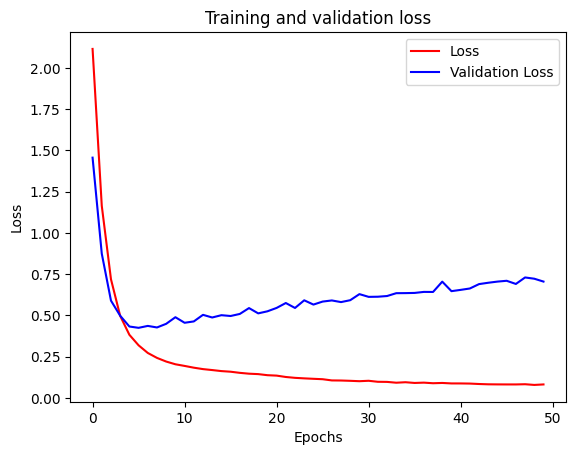

In [54]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss", "Validation Loss"])
plt.show()

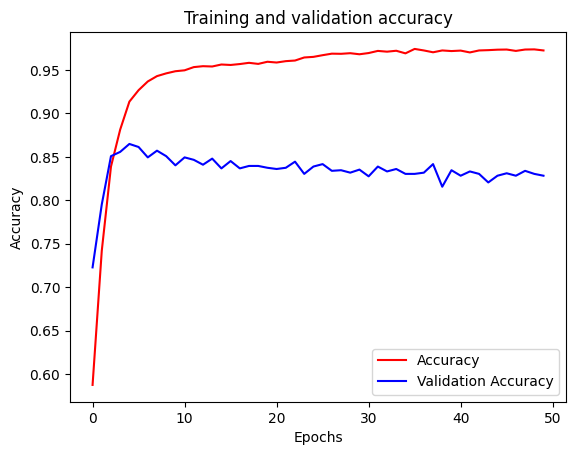

In [55]:
# grader-required-cell

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Accuracy", "Validation Accuracy"])
plt.show()

In [56]:
print(f"Training Accuracy: {max(acc):.3f}")
print(f"Validation Accuracy: {max(val_acc):.3f}")

Training Accuracy: 0.974
Validation Accuracy: 0.865


In [57]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming you have predicted labels for your validation data
y_pred = model.predict(val_pad_trunc_seq)  # Replace with your prediction method
y_true = val_labels.argmax(axis=1)  # Assuming your labels are one-hot encoded

# 'micro': Averages across all classes
precision = precision_score(y_true, y_pred.argmax(axis=1), average='micro')
recall = recall_score(y_true, y_pred.argmax(axis=1), average='micro')
f1 = f1_score(y_true, y_pred.argmax(axis=1), average='micro')

print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-score: {f1:.3f}")

45/45 [==============================] - 1s 5ms/step
Precision: 0.828
Recall: 0.828
F1-score: 0.828


## **PREDICT GENERATOR TEXT**

In [58]:
model.save('my_sentiment_model.keras')

In [ ]:
import pickle

# Save tokenizer to a file
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

print("Tokenizer saved successfully.")

In [ ]:
from tensorflow.keras.models import load_model

loaded_model = load_model('my_sentiment_model.h5')

In [ ]:
def preprocess_sentence(sentence):
  """Fungsi untuk memproses kalimat input.

  Args:
    sentence: Kalimat yang akan diproses.

  Returns:
    Urutan integer yang mewakili kalimat yang dipreproses.
  """
  # Preprocessing steps (tokenization, padding, truncation)
  tokens = tokenizer.texts_to_sequences([sentence])
  pad_trunc_seq = pad_sequences(tokens, padding=PADDING, truncating=TRUNCATING, maxlen=MAXLEN)
  return pad_trunc_seq[0]


In [ ]:
sentence = input("Masukkan kalimat: ")
preprocessed_sentence = preprocess_sentence(sentence)

In [ ]:
prediction = model.predict(np.expand_dims(preprocessed_sentence, axis=0))
predicted_class = prediction.argmax(axis=1)[0]

if predicted_class == 0:
  print("Sentimen: Netral")
elif predicted_class == 1:
  print("Sentimen: Positif")
else:
  print("Sentimen: Negatif")


In [ ]:
df = pd.read_csv('comments.csv')
df.head()

In [ ]:
# Function to preprocess sentence
def preprocess_sentence(sentence):
    """Fungsi untuk memproses kalimat input.

    Args:
        sentence: Kalimat yang akan diproses.

    Returns:
        Urutan integer yang mewakili kalimat yang dipreproses.
    """
    # Preprocessing steps (tokenization, padding, truncation)
    tokens = tokenizer.texts_to_sequences([sentence])
    pad_trunc_seq = pad_sequences(tokens, padding=PADDING, truncating=TRUNCATING, maxlen=MAXLEN)
    return pad_trunc_seq[0]

# Function to predict sentiment
def predict_sentiment(sentences):
    """Fungsi untuk memprediksi sentimen dari beberapa kalimat.

    Args:
        sentences: Daftar kalimat.

    Returns:
        Daftar prediksi sentimen.
    """
    preprocessed_sentences = [preprocess_sentence(sentence) for sentence in sentences]
    predictions = model.predict(np.array(preprocessed_sentences))
    predicted_classes = predictions.argmax(axis=1)
    return predicted_classes

# Load data
data = pd.read_csv('comments.csv')
data['text'] = data['text'].fillna('')
sentences = data['text'].tolist()

# Predict sentiment
predicted_classes = predict_sentiment(sentences)

# Print predictions
for i, predicted_class in enumerate(predicted_classes):
    if predicted_class == 0:
        print(f"Kalimat {i+1}: Sentimen: Netral")
    elif predicted_class == 1:
        print(f"Kalimat {i+1}: Sentimen: Positif")
    elif predicted_class == -1:
        print(f"Kalimat {i+1}: Sentimen: Negatif")

# Print predictions
# for i, predicted_class in enumerate(predicted_classes):
#     if predicted_class == 0:
#         sentiment = "Netral"
#     elif predicted_class == 1:
#         sentiment = "Positif"
#     else:
#         sentiment = "Negatif"
#     print(f"Kalimat {i+1}: Sentimen: {sentiment}")

# Save predictions to CSV
data['sentiment'] = predicted_classes
data.to_excel('predicted_comments.xlsx', index=False)
print("Prediksi sentimen telah disimpan di 'predicted_comments.csv'")

In [ ]:
# Function to predict sentiment (unchanged)
def predict_sentiment(sentences):
  """Fungsi untuk memprediksi sentimen dari beberapa kalimat.

  Args:
      sentences: Daftar kalimat.

  Returns:
      Daftar prediksi sentimen.
  """
  preprocessed_sentences = [preprocess_sentence(sentence) for sentence in sentences]
  predictions = model.predict(np.array(preprocessed_sentences))
  predicted_classes = predictions.argmax(axis=1)
  return predicted_classes

# Load data (unchanged)
data = pd.read_excel('uji.xlsx')
sentences = data['raw'].tolist()

# Predict sentiment (unchanged)
predicted_classes = predict_sentiment(sentences)

# Count sentiment labels
sentiment_counts = pd.Series(predicted_classes).value_counts()

# Calculate percentages
total_sentences = len(predicted_classes)
sentiment_percentages = (sentiment_counts / total_sentences) * 100

# Print sentiment distribution
print("Distribusi Sentimen:")
print(sentiment_percentages.to_string())

max_value = sentiment_percentages.max()
max_label = sentiment_percentages.idxmax()

# Print the sentiment label with the highest percentage
print(f"\nSentimen Tertinggi: {max_label} ({max_value:.2f}%)")
print("\n1:Positif 2:Negatif 0:Netral")
